In [1]:
!pip install snscrape

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

def scrape_tweets(query, max_tweets=1000):
    tweets = []
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if i >= max_tweets:
            break
        tweets.append([
            tweet.date, tweet.user.username, tweet.content, tweet.lang, tweet.likeCount, tweet.retweetCount
        ])
    df = pd.DataFrame(tweets, columns=["Date", "Username", "Content", "Language", "Likes", "Retweets"])
    return df

# Example queries
df_oneplus = scrape_tweets("OnePlus 13 lang:en since:2024-12-01", max_tweets=2000)
df_samsung = scrape_tweets("Samsung S25 lang:en since:2024-12-01", max_tweets=2000)

# Save as CSV
df_oneplus.to_csv("oneplus13_tweets.csv", index=False)
df_samsung.to_csv("samsung_s25_tweets.csv", index=False)

Error retrieving https://twitter.com/search?f=live&lang=en&q=OnePlus+13+lang%3Aen+since%3A2024-12-01&src=spelling_expansion_revert_click: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=OnePlus+13+lang%3Aen+since%3A2024-12-01&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))"))
4 requests to https://twitter.com/search?f=live&lang=en&q=OnePlus+13+lang%3Aen+since%3A2024-12-01&src=spelling_expansion_revert_click failed, giving up.
Errors: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=OnePlus+13+lang%3Aen+since%3A2024-12-01&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to

ScraperException: 4 requests to https://twitter.com/search?f=live&lang=en&q=OnePlus+13+lang%3Aen+since%3A2024-12-01&src=spelling_expansion_revert_click failed, giving up.

In [ ]:
!pip install --upgrade snscrape

In [ ]:
!pip install tweepy

In [ ]:
import tweepy
import pandas as pd

# Replace this with your own bearer token
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAMWpzgEAAAAAlLD7qHemnT%2B2UT5fObKMrCTXTPo%3Da0zr6DZY04qIvA0BdgctXS6b3RAqP14E1xf6aYpnqMq0WUJnkP'

# Initialize Tweepy client
client = tweepy.Client(bearer_token=BEARER_TOKEN)

def fetch_tweets(query, max_results=100, total_tweets=1000):
    all_tweets = []
    next_token = None

    while len(all_tweets) < total_tweets:
        response = client.search_recent_tweets(
            query=query,
            tweet_fields=["created_at", "lang", "public_metrics"],
            max_results=min(max_results, total_tweets - len(all_tweets)),
            next_token=next_token
        )
        
        if 'data' in response.meta or response.data:
            for tweet in response.data:
                all_tweets.append({
                    "Date": tweet.created_at,
                    "Text": tweet.text,
                    "Language": tweet.lang,
                    "Likes": tweet.public_metrics["like_count"],
                    "Retweets": tweet.public_metrics["retweet_count"]
                })

        if 'next_token' in response.meta:
            next_token = response.meta['next_token']
        else:
            break

    return pd.DataFrame(all_tweets)

# Example usage
df_oneplus = fetch_tweets("OnePlus 13 lang:en", max_results=100, total_tweets=500)
df_samsung = fetch_tweets("Samsung S25 lang:en", max_results=100, total_tweets=500)

# Save as CSV
df_oneplus.to_csv("oneplus13_api_tweets.csv", index=False)
df_samsung.to_csv("samsung_s25_api_tweets.csv", index=False)

In [ ]:
!pip install praw

In [ ]:
import praw
import pandas as pd

# Your credentials here
reddit = praw.Reddit(
    client_id='SgrR2n-tvu2cp_3RUBG4hg',
    client_secret='egdSGECG_ncI4r3V2heU-mDPqc_uL',
    user_agent='SmartphoneSentimentAnalyzer by /u/AssignmentOk5897',
    username='AssignmentOk5897',
    password='Anirudh30_*'
)

def fetch_posts(subreddit_name, query, limit=100):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for submission in subreddit.search(query, limit=limit, sort="new"):
        posts.append({
            "Title": submission.title,
            "Text": submission.selftext,
            "Score": submission.score,
            "Comments": submission.num_comments,
            "Created": submission.created_utc,
            "Subreddit": subreddit_name,
            "URL": submission.url
        })
    return posts

# Example queries
queries = ["OnePlus 13", "Samsung S25"]
subreddits = ["Android", "OnePlus", "Samsung"]
all_posts = []

for q in queries:
    for s in subreddits:
        all_posts.extend(fetch_posts(s, q, limit=50))

# Convert to DataFrame
df = pd.DataFrame(all_posts)
df.to_csv("reddit_posts_oneplus_vs_s25.csv", index=False)
print("Saved:", df.shape[0], "posts")

In [ ]:
import praw

reddit = praw.Reddit(
    client_id='SgrR2n-tvu2cp_3RUBG4hg',
    client_secret='egdSGECG_ncI4r3V2heU-mDPqc_uL',
    user_agent='RedditTestScript by /u/AssignmentOk5897',
    username='AssignmentOk5897',
    password='Anirudh30_*'
)

# Test API connection
try:
    print("Logged in as:", reddit.user.me())
except Exception as e:
    print("Error:", e)

In [40]:
import praw

reddit = praw.Reddit(
    client_id='SgrR2n-tvu2cp_3RUBG4hg',               # ✅ this is correct
    client_secret='egdSGECG_ncI4r3V2heU-mDPqc_uLA',          # 🔒 get this from app settings
    user_agent='SmartphoneSentimentAnalyzer by /u/AssignmentOk5897',
    username='AssignmentOk5897',
    password='Anirudh30_*'                     # 🔐 password you just set
)

# Test login
try:
    print("Logged in as:", reddit.user.me())
except Exception as e:
    print("❌ Error:", e)

Logged in as: AssignmentOk5897


In [42]:
import praw
import pandas as pd

# Your working Reddit instance
reddit = praw.Reddit(
    client_id='SgrR2n-tvu2cp_3RUBG4hg',
    client_secret='egdSGECG_ncI4r3V2heU-mDPqc_uLA',
    user_agent='SmartphoneSentimentAnalyzer by /u/AssignmentOk5897',
    username='AssignmentOk5897',
    password='Anirudh30_*'
)

def fetch_posts(subreddit_name, query, limit=100):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    for submission in subreddit.search(query, sort="new", limit=limit):
        posts.append({
            "Subreddit": subreddit_name,
            "Title": submission.title,
            "Text": submission.selftext,
            "Score": submission.score,
            "Comments": submission.num_comments,
            "Created_UTC": submission.created_utc,
            "URL": submission.url
        })
    return posts

# Subreddits to search in
subreddits = ["Android", "OnePlus", "Samsung", "Smartphones"]
queries = ["OnePlus 13", "Samsung S25"]

# Fetch and combine
all_posts = []
for sub in subreddits:
    for query in queries:
        all_posts.extend(fetch_posts(sub, query, limit=50))

# Convert to DataFrame and save
df = pd.DataFrame(all_posts)
df.to_csv("reddit_posts_oneplus_vs_s25.csv", index=False)
print(f"✅ Saved {len(df)} posts to reddit_posts_oneplus_vs_s25.csv")

✅ Saved 384 posts to reddit_posts_oneplus_vs_s25.csv


In [ ]:
import pandas as pd

df = pd.read_csv("reddit_posts_oneplus_vs_s25.csv")

print(df.head())

save_path = "/Users/anirudhravipudi/Desktop/AI/Projects/reddit_posts_oneplus_vs_s25.csv"
df.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")

In [43]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords once
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    if pd.isna(text):
        return ""
    # Lowercase
    text = text.lower()
    # Remove links, mentions, and special characters
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-zA-Z0-9\s]", '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply to both title and body
df['Cleaned_Title'] = df['Title'].apply(clean_text)
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Optional: Save cleaned version
df.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/reddit_posts_cleaned.csv", index=False)

print("✅ Text cleaned and saved.")

✅ Text cleaned and saved.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install nltk textblob transformers torch

In [44]:
import nltk 
nltk.download('vader.lexicon')
nltk.download('punkt')

[nltk_data] Error loading vader.lexicon: Package 'vader.lexicon' not
[nltk_data]     found in index
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

# Apply VADER on cleaned title + text
df['VADER_Compound'] = df['Cleaned_Text'].apply(lambda x: vader.polarity_scores(x)['compound'])
df['VADER_Sentiment'] = df['VADER_Compound'].apply(
    lambda score: 'Positive' if score > 0.05 else 'Negative' if score < -0.05 else 'Neutral'
)

In [46]:
from textblob import TextBlob

df['TextBlob_Polarity'] = df['Cleaned_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['TextBlob_Sentiment'] = df['TextBlob_Polarity'].apply(
    lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral'
)

In [47]:
from transformers import pipeline

# Load BERT sentiment pipeline (might take a few seconds)
bert_pipeline = pipeline("sentiment-analysis")

# Run BERT on the first 100 rows (for speed; can increase later)
df['BERT_Sentiment'] = df['Cleaned_Text'].head(100).apply(lambda x: bert_pipeline(x[:512])[0]['label'])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [48]:
from transformers import pipeline

# Load DistilBERT sentiment pipeline explicitly
bert_pipeline = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

# Apply to first 100 posts (avoid API/model timeout)
df['BERT_Sentiment'] = df['Cleaned_Text'].head(100).apply(lambda x: bert_pipeline(x[:512])[0]['label'])

Device set to use mps:0


In [49]:
df.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/reddit_sentiment_combined.csv", index=False)
print("✅ Sentiment analysis results saved!")

✅ Sentiment analysis results saved!


DataFrame saved to: /Users/anirudhravipudi/Desktop/AI/Projects/reddit_sentiment_combined.csv
Reloaded DataFrame:

  Subreddit                                              Title  \
0   Android  Head of OxygenOS Operation Team says the pre-i...   
1   Android  Unlock Night Mode on Instagram with the OnePlu...   
2   Android  OnePlus unveils its latest flagship smartwatch...   
3   Android  S25 Ultra vs OnePlus 13 - Samsung has no Excus...   
4   Android  OnePlus Watch 3 Set to Launch on February 18 i...   

                                                Text  Score  Comments  \
0                                                NaN    329        37   
1                                                NaN     34         5   
2  *(For some reason, OnePlus hasn't published th...     78        51   
3                                                NaN    163       148   
4  (*For some reason, OnePlus hasn't published th...     43        21   

    Created_UTC                                   

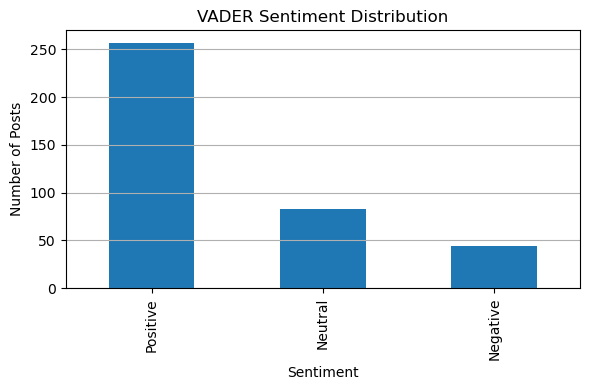

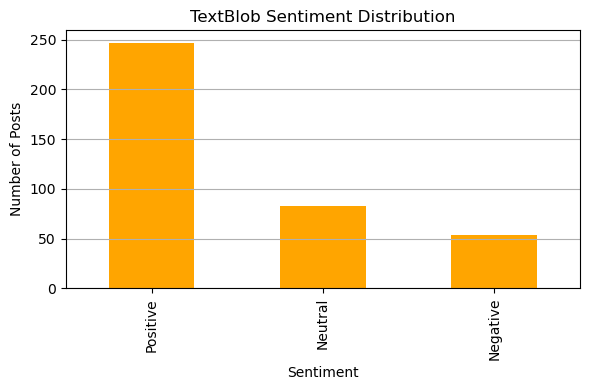

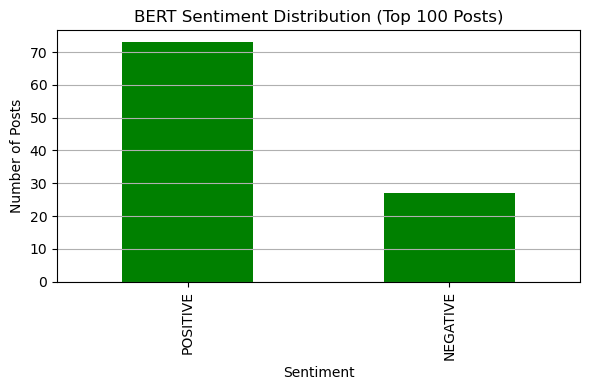

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

save_path = "/Users/anirudhravipudi/Desktop/AI/Projects/reddit_sentiment_combined.csv"
df.to_csv(save_path, index=False)
print(f"DataFrame saved to: {save_path}")

df = pd.read_csv(save_path)
print("Reloaded DataFrame:\n")
print(df.head())

vader_counts = df['VADER_Sentiment'].value_counts()
textblob_counts = df['TextBlob_Sentiment'].value_counts()
bert_counts = df['BERT_Sentiment'].value_counts()

plt.figure(figsize=(6, 4))
vader_counts.plot(kind='bar')
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 5. Plot TextBlob Sentiment
plt.figure(figsize=(6, 4))
textblob_counts.plot(kind='bar', color='orange')
plt.title("TextBlob Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 6. Plot BERT Sentiment
plt.figure(figsize=(6, 4))
bert_counts.plot(kind='bar', color='green')
plt.title("BERT Sentiment Distribution (Top 100 Posts)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

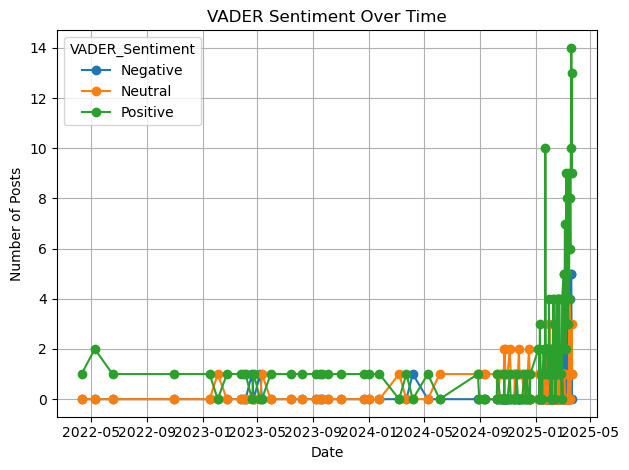

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Created_UTC'], unit='s')
df['Date'] = df['Date'].dt.date

vader_trend = df.groupby(['Date', 'VADER_Sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(10, 5))
vader_trend.plot(kind='line', marker ='o')
plt.title("VADER Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
!pip install wordcloud

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


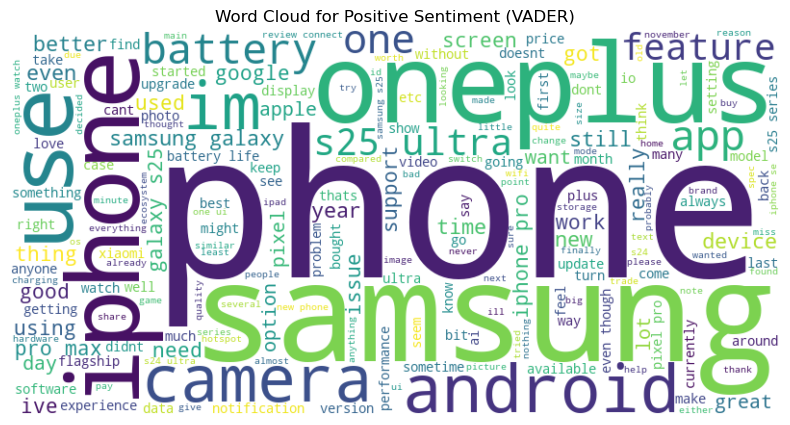

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['VADER_Sentiment'] == 'Positive']['Cleaned_Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment (VADER)")
plt.show()

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_29513/1419052343.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

/opt/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


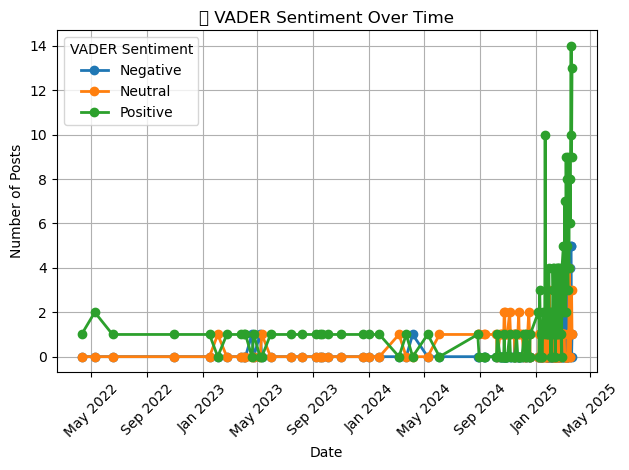

In [54]:
import matplotlib.dates as mdates

# Convert 'Date' column to datetime.date if not already
df['Date'] = pd.to_datetime(df['Created_UTC'], unit='s').dt.date

# Group by date and sentiment
vader_trend = df.groupby(['Date', 'VADER_Sentiment']).size().unstack().fillna(0)

# Plot with improvements
plt.figure(figsize=(14, 6))
vader_trend.plot(marker='o', linewidth=2)
plt.title("📈 VADER Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")

# Format x-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(True)
plt.tight_layout()
plt.legend(title="VADER Sentiment")
plt.show()

/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_29513/2291254101.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

/opt/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


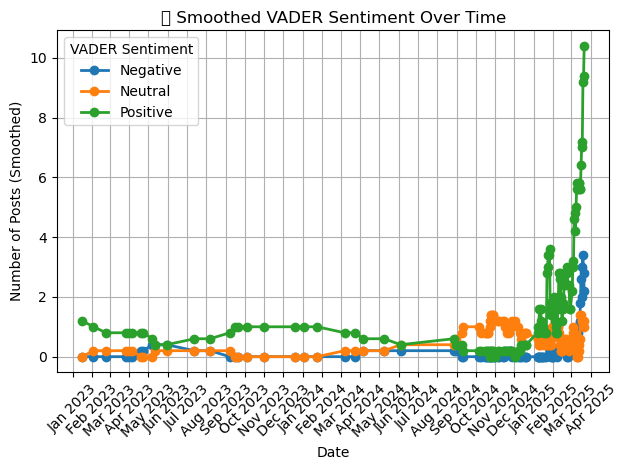

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df['Date'] = pd.to_datetime(df['Created_UTC'], unit='s').dt.date
vader_trend = df.groupby(['Date', 'VADER_Sentiment']).size().unstack().fillna(0)

# Apply 5-day rolling average to smooth out the curves
vader_trend_smoothed = vader_trend.rolling(window=5).mean()

# Plot smoothed curves
plt.figure(figsize=(14, 6))
vader_trend_smoothed.plot(marker='o', linewidth=2)

plt.title("📉 Smoothed VADER Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts (Smoothed)")

# Rotate and format date ticks
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(True)
plt.tight_layout()
plt.legend(title="VADER Sentiment")
plt.show()

In [56]:
import pandas as pd
import tweepy
from datetime import datetime 

client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAMWpzgEAAAAAlLD7qHemnT%2B2UT5fObKMrCTXTPo%3Da0zr6DZY04qIvA0BdgctXS6b3RAqP14E1xf6aYpnqMq0WUJnkP")

def fetch_tweets(query, start_time, end_time, max_results=100):
    tweets_data = []
    response = client.search_all_tweets(
        query=query,
        start_time=start_time,
        end_time=end_time,
        tweet_fields=["created_at", "text", "public_metrics", "lang"],
        max_results=max_results
    )
    
    if response.data:
        for tweet in response.data:
            tweets_data.append({
                "Date": tweet.created_at,
                "Text": tweet.text,
                "Likes": tweet.public_metrics["like_count"],
                "Retweets": tweet.public_metrics["retweet_count"],
                "Language": tweet.lang
            })

    return pd.DataFrame(tweets_data)

# Define query and date ranges
query = '"OnePlus 13" lang:en'
date_ranges = [
    ("2024-12-01T00:00:00Z", "2024-12-31T23:59:59Z"),
    ("2025-01-01T00:00:00Z", "2025-01-31T23:59:59Z"),
    ("2025-02-01T00:00:00Z", "2025-02-29T23:59:59Z"),
    ("2025-03-01T00:00:00Z", "2025-03-22T23:59:59Z")
]

# Fetch and combine
all_tweets = pd.DataFrame()
for start, end in date_ranges:
    df_month = fetch_tweets(query, start, end, max_results=100)
    all_tweets = pd.concat([all_tweets, df_month], ignore_index=True)

all_tweets.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/twitter_oneplus13_dec_to_mar.csv", index=False)
print("✅ Twitter data saved!")

Forbidden: 403 Forbidden
When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.

In [70]:
import tweepy
import pandas as pd

# Your bearer token
client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAMWpzgEAAAAAlLD7qHemnT%2B2UT5fObKMrCTXTPo%3Da0zr6DZY04qIvA0BdgctXS6b3RAqP14E1xf6aYpnqMq0WUJnkP")

def fetch_recent_tweets(query, max_results=100):
    tweets_data = []
    response = client.search_recent_tweets(
        query=query,
        tweet_fields=["created_at", "text", "public_metrics", "lang"],
        max_results=max_results
    )

    if response.data:
        for tweet in response.data:
            tweets_data.append({
                "Date": tweet.created_at,
                "Text": tweet.text,
                "Likes": tweet.public_metrics["like_count"],
                "Retweets": tweet.public_metrics["retweet_count"],
                "Language": tweet.lang
            })

    return pd.DataFrame(tweets_data)

# Run for OnePlus 13
df_oneplus = fetch_recent_tweets('"OnePlus 13" lang:en', max_results=100)
df_samsung = fetch_recent_tweets('"Samsung S25" lang:en', max_results=100)

# Save
df_oneplus.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/twitter_oneplus13_recent.csv", index=False)
df_samsung.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/twitter_s25_recent.csv", index=False)

print("✅ Recent tweets saved.")

TooManyRequests: 429 Too Many Requests
Usage cap exceeded: Monthly product cap

In [ ]:
!pip install gnews

In [72]:
from gnews import GNews
import pandas as pd

# Set up client
news = GNews(language='en', country='IN', max_results=50)

# Example query for OnePlus 13
results_oneplus = news.get_news('OnePlus 13 review')
results_samsung = news.get_news('Samsung S25 review')

# Convert to DataFrame
df_oneplus = pd.DataFrame(results_oneplus)
df_samsung = pd.DataFrame(results_samsung)

# Save to CSV
df_oneplus.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_oneplus13.csv", index=False)
df_samsung.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_samsung_s25.csv", index=False)

print("✅ News articles saved!")

✅ News articles saved!


In [73]:
import pandas as pd

df_oneplus = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_oneplus13.csv")
print("📱 OnePlus 13 Articles:")
print(df_oneplus.head())

# Load the Samsung news data
df_samsung = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_samsung_s25.csv")
print("\n📱 Samsung S25 Articles:")
print(df_samsung.head())

📱 OnePlus 13 Articles:
                                               title  \
0  5 meaningful features of OnePlus 13 everyone s...   
1  OnePlus 13 review: An all-round Android flagsh...   
2  OnePlus 13: a flagship smartphone with almost ...   
3   OnePlus 13 Review: A New Beginning - Gadgets 360   
4  OnePlus 13 review: The Flagship Killer is back...   

                                         description  \
0  5 meaningful features of OnePlus 13 everyone s...   
1  OnePlus 13 review: An all-round Android flagsh...   
2  OnePlus 13: a flagship smartphone with almost ...   
3    OnePlus 13 Review: A New Beginning  Gadgets 360   
4  OnePlus 13 review: The Flagship Killer is back...   

                  published date  \
0  Tue, 18 Mar 2025 03:17:00 GMT   
1  Tue, 18 Mar 2025 11:28:56 GMT   
2  Fri, 21 Mar 2025 23:18:08 GMT   
3  Tue, 07 Jan 2025 08:00:00 GMT   
4  Fri, 21 Feb 2025 08:00:00 GMT   

                                                 url  \
0  https://news.google.com/rss

In [74]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|[^a-zA-Z0-9\s]", '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply to OnePlus and Samsung datasets
df_oneplus['Cleaned_Title'] = df_oneplus['title'].apply(clean_text)
df_oneplus['Cleaned_Description'] = df_oneplus['description'].apply(clean_text)

df_samsung['Cleaned_Title'] = df_samsung['title'].apply(clean_text)
df_samsung['Cleaned_Description'] = df_samsung['description'].apply(clean_text)

# Save cleaned files
df_oneplus.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_oneplus13_cleaned.csv", index=False)
df_samsung.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_samsung_s25_cleaned.csv", index=False)

print("🧼 Cleaned text saved.")


🧼 Cleaned text saved.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import pipeline
import nltk
import pandas as pd
# Load cleaned news
df_oneplus = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_oneplus13_cleaned.csv")
df_samsung = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_samsung_s25_cleaned.csv")

# Download once
nltk.download('vader_lexicon')

# Initialize analyzers
vader = SentimentIntensityAnalyzer()
bert_pipeline = pipeline("sentiment-analysis")

def apply_sentiment(df, text_column):
    # VADER
    df['VADER_Compound'] = df[text_column].apply(lambda x: vader.polarity_scores(x)['compound'])
    df['VADER_Sentiment'] = df['VADER_Compound'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')

    # TextBlob
    df['TextBlob_Polarity'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['TextBlob_Sentiment'] = df['TextBlob_Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

    # BERT (limit to first 50 rows for speed)
    df['BERT_Sentiment'] = df[text_column].head(50).apply(lambda x: bert_pipeline(x[:512])[0]['label'])

    return df

# Run on Cleaned_Description
df_oneplus = apply_sentiment(df_oneplus, 'Cleaned_Description')
df_samsung = apply_sentiment(df_samsung, 'Cleaned_Description')

# Save results
df_oneplus.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_oneplus13_sentiment.csv", index=False)
df_samsung.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_samsung_s25_sentiment.csv", index=False)

print("✅ Sentiment analysis completed and saved.")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


✅ Sentiment analysis completed and saved.


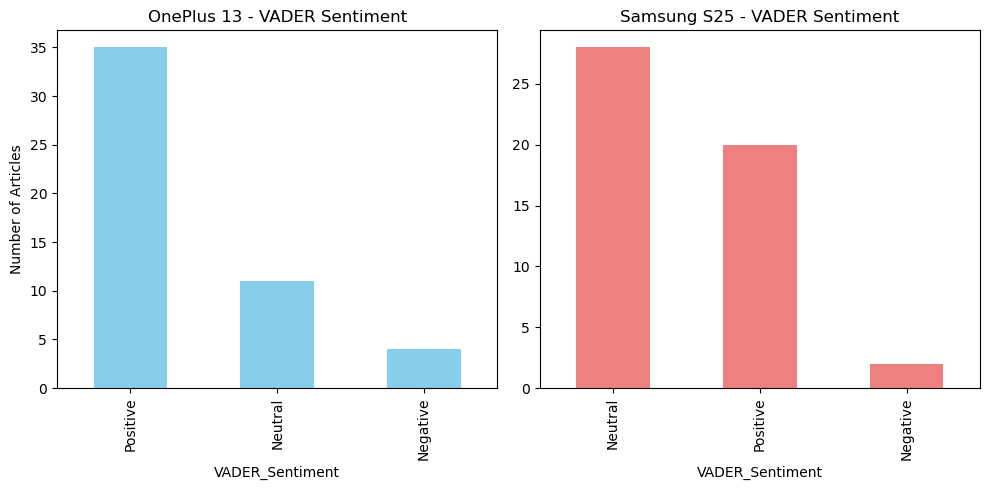

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
# Load sentiment results
df_oneplus = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_oneplus13_sentiment.csv")
df_samsung = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_samsung_s25_sentiment.csv")

# Count sentiment categories
vader_oneplus = df_oneplus['VADER_Sentiment'].value_counts()
vader_samsung = df_samsung['VADER_Sentiment'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
vader_oneplus.plot(kind='bar', color='skyblue')
plt.title("OnePlus 13 - VADER Sentiment")
plt.ylabel("Number of Articles")

plt.subplot(1, 2, 2)
vader_samsung.plot(kind='bar', color='lightcoral')
plt.title("Samsung S25 - VADER Sentiment")

plt.tight_layout()
plt.show()

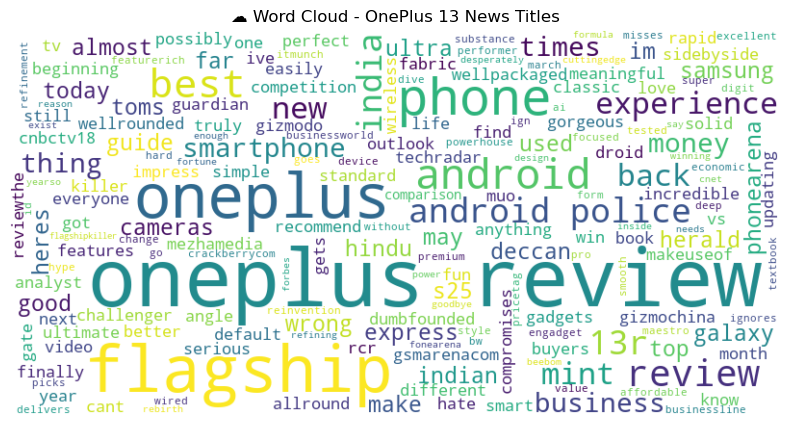

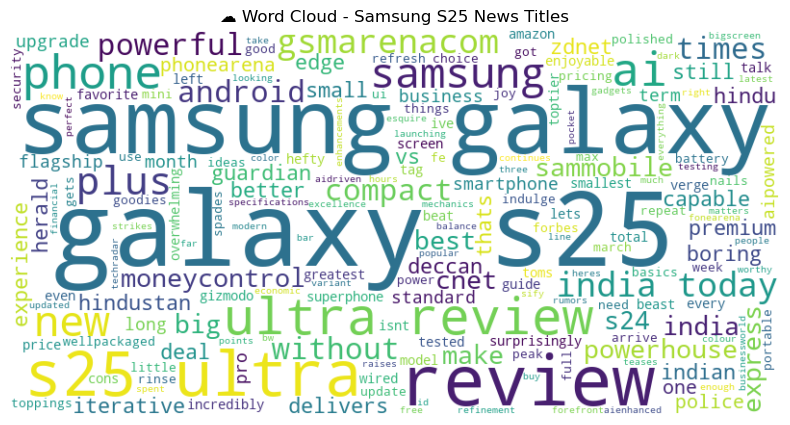

In [77]:
from wordcloud import WordCloud
from wordcloud import WordCloud

# Combine cleaned titles
text_oneplus = " ".join(df_oneplus['Cleaned_Title'].dropna())
text_samsung = " ".join(df_samsung['Cleaned_Title'].dropna())

# Generate word clouds
wordcloud_oneplus = WordCloud(width=800, height=400, background_color='white').generate(text_oneplus)
wordcloud_samsung = WordCloud(width=800, height=400, background_color='white').generate(text_samsung)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_oneplus, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Word Cloud - OnePlus 13 News Titles")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_samsung, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Word Cloud - Samsung S25 News Titles")
plt.show()

         Model  VADER (Compound)  TextBlob (Polarity)
0   OnePlus 13          0.252386             0.214428
1  Samsung S25          0.192136             0.173601


/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_29513/3977857095.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


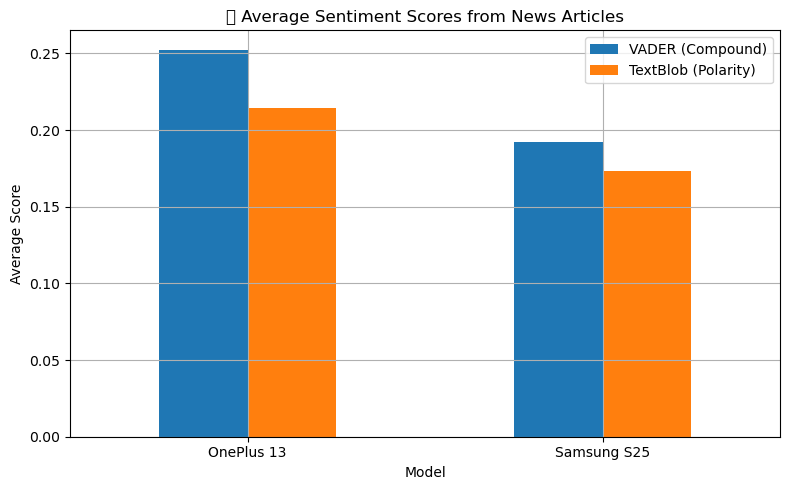

In [78]:
# Load again if needed
df_oneplus = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_oneplus13_sentiment.csv")
df_samsung = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/news_samsung_s25_sentiment.csv")

# Calculate averages
avg_scores = {
    "Model": ["OnePlus 13", "Samsung S25"],
    "VADER (Compound)": [
        df_oneplus['VADER_Compound'].mean(),
        df_samsung['VADER_Compound'].mean()
    ],
    "TextBlob (Polarity)": [
        df_oneplus['TextBlob_Polarity'].mean(),
        df_samsung['TextBlob_Polarity'].mean()
    ]
}

# Convert to DataFrame
df_avg = pd.DataFrame(avg_scores)
print(df_avg)

# Plot
df_avg.set_index("Model").plot(kind="bar", figsize=(8, 5), grid=True, title="📊 Average Sentiment Scores from News Articles")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
!pip install spacy

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

In [79]:
import gensim
from gensim import corpora
import spacy
import pandas as pd
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Combine OnePlus + Samsung text
combined_text = pd.concat([
    df_oneplus['Cleaned_Description'].dropna(),
    df_samsung['Cleaned_Description'].dropna()
])

# Tokenization, remove stopwords + lemmatization
def preprocess(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

texts = combined_text.apply(preprocess).tolist()

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=10)

# Display topics
topics = lda_model.print_topics(num_words=6)
for i, topic in topics:
    print(f"🔹 Topic {i + 1}: {topic}")

03/22/2025 08:03:57 PM - adding document #0 to Dictionary<0 unique tokens: []>
03/22/2025 08:03:57 PM - built Dictionary<275 unique tokens: ['express', 'feature', 'indian', 'know', 'meaningful']...> from 100 documents (total 784 corpus positions)
03/22/2025 08:03:57 PM - Dictionary lifecycle event {'msg': "built Dictionary<275 unique tokens: ['express', 'feature', 'indian', 'know', 'meaningful']...> from 100 documents (total 784 corpus positions)", 'datetime': '2025-03-22T20:03:57.846430', 'gensim': '4.3.3', 'python': '3.10.16 (main, Dec 11 2024, 10:22:29) [Clang 14.0.6 ]', 'platform': 'macOS-15.3.2-arm64-arm-64bit', 'event': 'created'}
03/22/2025 08:03:57 PM - using symmetric alpha at 0.25
03/22/2025 08:03:57 PM - using symmetric eta at 0.25
03/22/2025 08:03:57 PM - using serial LDA version on this node
03/22/2025 08:03:57 PM - running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 100 documents, updating model once every 100 documents, evaluating pe

🔹 Topic 1: 0.077*"samsung" + 0.066*"galaxy" + 0.033*"review" + 0.030*"ultra" + 0.025*"phone" + 0.020*"powerful"
🔹 Topic 2: 0.061*"review" + 0.057*"oneplus" + 0.035*"phone" + 0.029*"flagship" + 0.029*"android" + 0.024*"samsung"
🔹 Topic 3: 0.079*"review" + 0.077*"oneplus" + 0.033*"android" + 0.033*"phone" + 0.031*"samsung" + 0.029*"flagship"
🔹 Topic 4: 0.093*"review" + 0.079*"galaxy" + 0.065*"samsung" + 0.044*"oneplus" + 0.042*"ultra" + 0.021*"india"


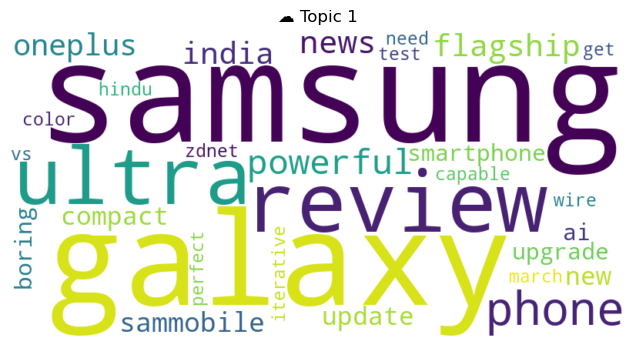

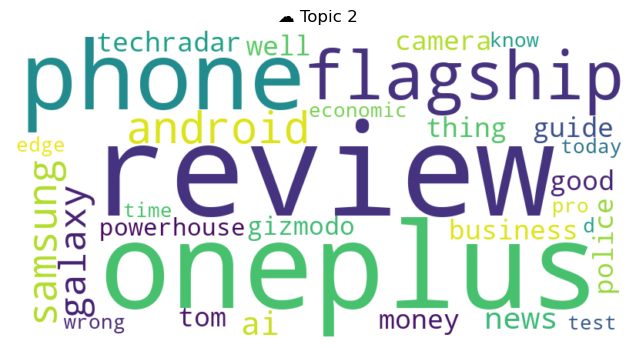

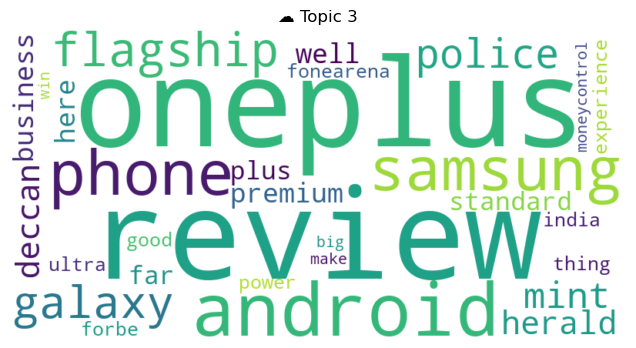

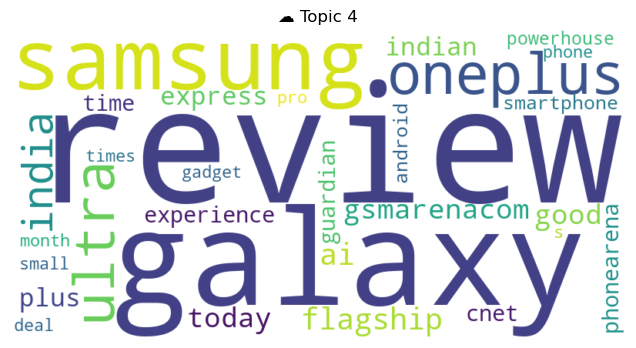

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
num_topics = lda_model.num_topics

for t in range(num_topics):
    plt.figure(figsize=(8, 4))
    plt.axis('off')
    plt.title(f"☁️ Topic {t + 1}", fontsize=12)

    # Get top words and weights
    words = dict(lda_model.show_topic(t, topn=30))
    
    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

In [92]:
!pip install youtube-comment-downloader

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1


In [98]:
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd


video_url = "https://www.youtube.com/watch?v=NqQx4IjZ2k0"
video_id = video_url.split("v=")[-1]

downloader = YoutubeCommentDownloader()
comments = []

for comment in downloader.get_comments_from_url(f"https://www.youtube.com/watch?v=NqQx4IjZ2k0", sort_by=0):
    comments.append(comment['text'])

# Save to DataFrame
df_comments = pd.DataFrame(comments, columns=["Comment"])
df_comments.to_csv(f"/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_trial_video.csv", index=False)
print("✅ Comments saved.")

✅ Comments saved.


In [102]:
import pandas as pd

# Replace VIDEO_ID with the actual ID or filename you saved
file_path = "/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_trial_video.csv"

# Load and display top 5 comments
df_youtube = pd.read_csv(file_path)
print("🎬 Top YouTube Comments:\n")
print(df_youtube.head())

🎬 Top YouTube Comments:

                                             Comment
0  Samsung promised 7 years of updates and so far...
1  As much as i love Samsungs oneui i have to adm...
2  Ohh lordd...why does samsung users think they ...
3  No need for me to watch to the end, I compared...
4  Op 13 rocks... The better phone !!!! Oneplus f...


In [104]:
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd

# Set the YouTube video URL
video_url = "https://www.youtube.com/watch?v=_fw7B0SKbFk"
video_id = video_url.split("v=")[-1]

# Initialize downloader
downloader = YoutubeCommentDownloader()
comments = []

# Download comments
for comment in downloader.get_comments_from_url(video_url, sort_by=0):  # sort_by=0 = top comments
    comments.append(comment['text'])

# Convert to DataFrame
df = pd.DataFrame(comments, columns=["Comment"])

# Save to CSV
save_path = f"/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_trial_video_2.csv"
df.to_csv(save_path, index=False)

print(f"✅ Comments saved to: {save_path}")

✅ Comments saved to: /Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_trial_video_2.csv


In [106]:
import pandas as pd

# Path to your latest YouTube comments file
file_path = "/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_trial_video_2.csv"

# Load the CSV
df = pd.read_csv(file_path)

# Show the first 5 comments
print("🎬 Top YouTube Comments (Preview):\n")
print(df.head())

🎬 Top YouTube Comments (Preview):

                                             Comment
0                            One plus 13 best option
1  Just watch them playing the same video next to...
2  samsung s25 plus is 750 for me and oneplus 13 ...
3  SAMSUNG COMPANY PLAY WITH HIS COSTEMER AND FUN...
4                          Oneplus 13 blue color 😅🫶🏿


In [108]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# File paths
file1 = "/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_trial_video.csv"
file2 = "/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_trial_video_2.csv"

# Load files
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Combine them
df = pd.concat([df1, df2], ignore_index=True)

# Clean function
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|[^a-zA-Z0-9\s]", '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Clean comments
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# Save the cleaned combined data
cleaned_path = "/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_combined_cleaned.csv"
df.to_csv(cleaned_path, index=False)

print(f"✅ Combined and cleaned comments saved to: {cleaned_path}")

✅ Combined and cleaned comments saved to: /Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_combined_cleaned.csv


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import pipeline
import nltk

# Load the cleaned combined comments
df = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_combined_cleaned.csv")

# Download required NLTK resources
nltk.download('vader_lexicon')

# Initialize analyzers
vader = SentimentIntensityAnalyzer()
bert_pipeline = pipeline("sentiment-analysis")

# VADER
df['VADER_Compound'] = df['Cleaned_Comment'].apply(lambda x: vader.polarity_scores(x)['compound'])
df['VADER_Sentiment'] = df['VADER_Compound'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')

# TextBlob
df['TextBlob_Polarity'] = df['Cleaned_Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['TextBlob_Sentiment'] = df['TextBlob_Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# BERT (on top 100 rows for speed)
#df['BERT_Sentiment'] = df['Cleaned_Comment'].head(100).apply(
  #  lambda x: bert_pipeline(str(x)[:512])[0]['label'] if isinstance(x, str) and x.strip() else 'Neutral'
#)

# Save results
df.to_csv("/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_sentiment.csv", index=False)
print("✅ Sentiment analysis completed and saved.")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


AttributeError: 'float' object has no attribute 'encode'

In [116]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

# 📥 Load your cleaned comments
file_path = "/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_combined_cleaned.csv"
df = pd.read_csv(file_path)

# 🧼 Ensure all comments are clean strings
df['Cleaned_Comment'] = df['Cleaned_Comment'].fillna("").astype(str)

# 📥 Download VADER lexicon (if not already)
nltk.download('vader_lexicon')

# 🔍 Initialize VADER
vader = SentimentIntensityAnalyzer()

# 🎯 VADER Sentiment
df['VADER_Compound'] = df['Cleaned_Comment'].apply(lambda x: vader.polarity_scores(x)['compound'])
df['VADER_Sentiment'] = df['VADER_Compound'].apply(
    lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral'
)

# 💬 TextBlob Sentiment
df['TextBlob_Polarity'] = df['Cleaned_Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['TextBlob_Sentiment'] = df['TextBlob_Polarity'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)

# 💾 Save the sentiment-enhanced CSV
output_path = "/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_sentiment.csv"
df.to_csv(output_path, index=False)

print(f"✅ Sentiment analysis complete and saved to: {output_path}")

✅ Sentiment analysis complete and saved to: /Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_sentiment.csv


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anirudhravipudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [118]:
from transformers import pipeline
import pandas as pd

# 📥 Load the file with VADER & TextBlob already done
df = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_sentiment.csv")

# 🧼 Ensure Cleaned_Comment column is valid
df['Cleaned_Comment'] = df['Cleaned_Comment'].fillna("").astype(str)

# ⚙️ Load BERT sentiment pipeline
bert_pipeline = pipeline("sentiment-analysis")

# 🪄 Initialize BERT Sentiment column with default
df['BERT_Sentiment'] = 'Neutral'

# 🧪 Run BERT only on the first 100 valid rows (for speed)
valid_rows = df[df['Cleaned_Comment'].str.strip() != ""].head(100)

for idx, row in valid_rows.iterrows():
    try:
        sentiment = bert_pipeline(row['Cleaned_Comment'][:512])[0]['label']
        df.at[idx, 'BERT_Sentiment'] = sentiment
    except Exception as e:
        print(f"⚠️ Skipped index {idx} due to error: {e}")
        df.at[idx, 'BERT_Sentiment'] = 'Neutral'

# 💾 Save updated file
output_path = "/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_sentiment.csv"
df.to_csv(output_path, index=False)

print("✅ BERT sentiment added and file updated!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


✅ BERT sentiment added and file updated!


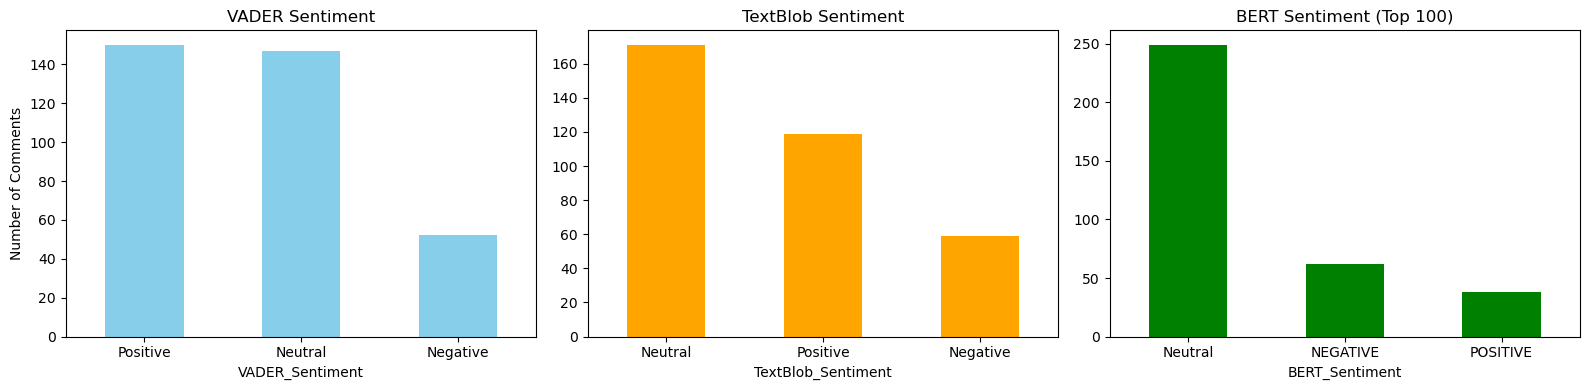

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the final sentiment file
df = pd.read_csv("/Users/anirudhravipudi/Desktop/AI/Projects/youtube_comments_sentiment.csv")

# Count sentiment distributions
vader_counts = df['VADER_Sentiment'].value_counts()
textblob_counts = df['TextBlob_Sentiment'].value_counts()
bert_counts = df['BERT_Sentiment'].value_counts()

# Plot all three
plt.figure(figsize=(16, 4))

# VADER
plt.subplot(1, 3, 1)
vader_counts.plot(kind='bar', color='skyblue')
plt.title("VADER Sentiment")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)

# TextBlob
plt.subplot(1, 3, 2)
textblob_counts.plot(kind='bar', color='orange')
plt.title("TextBlob Sentiment")
plt.xticks(rotation=0)

# BERT
plt.subplot(1, 3, 3)
bert_counts.plot(kind='bar', color='green')
plt.title("BERT Sentiment (Top 100)")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

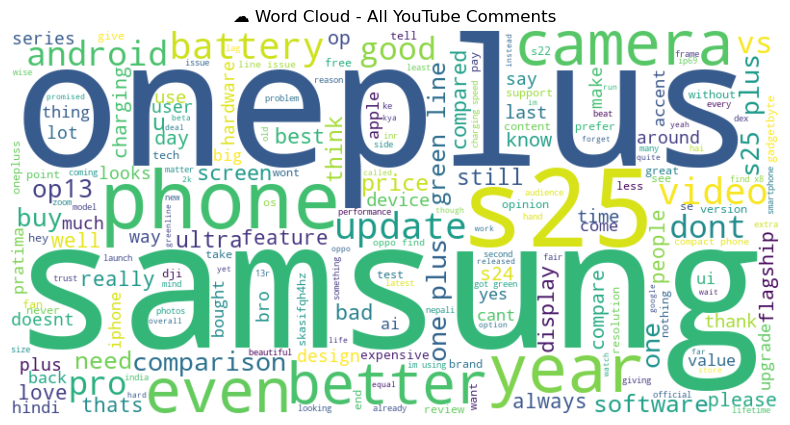

/opt/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


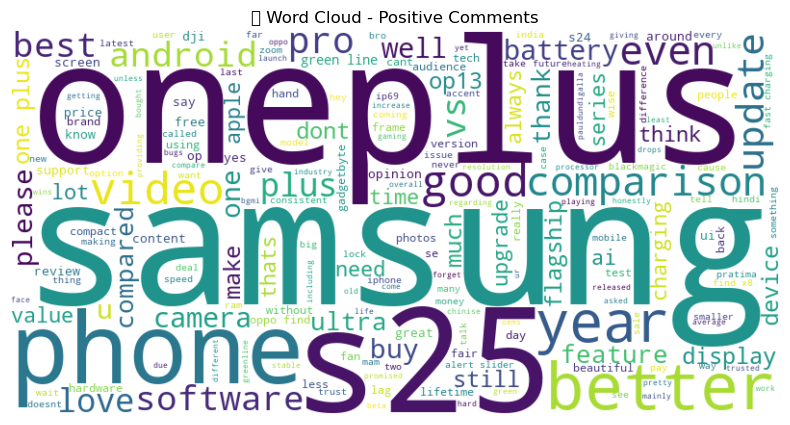

/opt/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


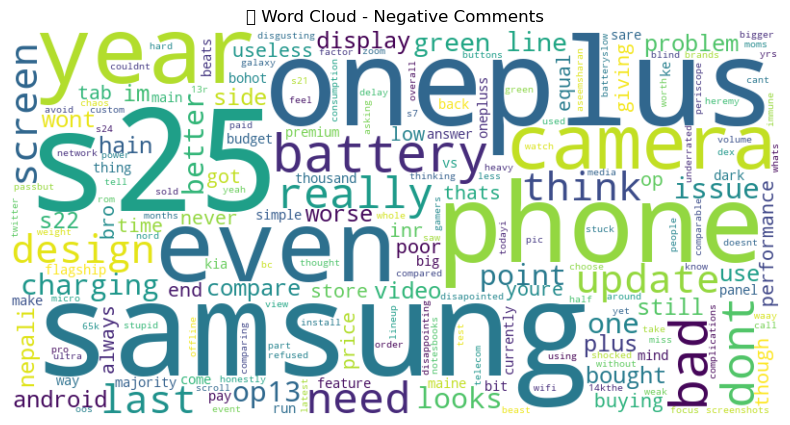

In [122]:
from wordcloud import WordCloud

# Basic all-comments word cloud
all_text = " ".join(df['Cleaned_Comment'].dropna())
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Word Cloud - All YouTube Comments")
plt.show()

# By sentiment (using VADER)
positive_text = " ".join(df[df['VADER_Sentiment'] == 'Positive']['Cleaned_Comment'])
negative_text = " ".join(df[df['VADER_Sentiment'] == 'Negative']['Cleaned_Comment'])

# Positive Word Cloud
wc_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title("🟢 Word Cloud - Positive Comments")
plt.show()

# Negative Word Cloud
wc_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title("🔴 Word Cloud - Negative Comments")
plt.show()